# TP5 - coloration de graphes

L'objectif de ce TP est de mettre en œuvre un algorithme de coloration de graphes.

La coloration de graphes est un problème fameux en théorie des graphes. Etant donné un graphe non orienté, comment attribuer une couleur à chaque sommet du graphe de telle sorte que deux sommets reliés par une arête ne soient pas de la même couleur. Bien sûr, le jeu n'est intéressant que si on chercher à utiliser le moins de couleurs possible.

Le nombre minimal de couleurs est appelé le nombre **chromatique** et noté $\chi(G)$ pour un graphe $G$. Si on sait colorer un graphe avec $k$ couleurs on dit que le graphe est $k-$colorable.

Savoir résoudre ce problème c'est savoir colorier une carte sans que deux pays voisins aient la même couleur (c'est l'illustration la plus courante de la coloration de graphes), savoir attribuer des fréquences à des antennes relais sans que celles-ci interfèrent, voire résoudre un Sudoku. Dans la vie courante, on tombe donc fréquemment sur ce problème, pour peu qu'on sache identifier que c'est un problème de coloration ...

On pourra lire avec attention la page anglophone sur la coloration de graphes de Wikipedia.

## De la difficulté du problème

Malheureusement, la coloration minimum est un problème dit *difficile*. Trouver le nombre chromatique d'un graphe est un problème NP-complet (rendez-vous en master pour mieux comprendre cette notion). Il faut retenir qu'il n'existe pas d'algorithme s'exécutant en temps polynomial pour résoudre ce problème.

Ainsi, sauf pour des cas de graphes particuliers, il est nécessaire de mettre en place des algorithmes heuristiques, qui permettent de calculer une solution approchée : une coloration de graphe mais sans garantie d'avoir atteint le nombre chromatique.

## Un algorithme glouton

Dans un premier temps, nous allons mettre en oeuvre un algorithme glouton naïf (glouton signifie qu'on ne remet jamais en cause un choix réalisé durant le déroulement de l'algorithme, ici une attribution de couleur à un sommet). Nous allons envisager tous les sommets successivement et attribuer à un sommet la plus petite couleur possible parmi celles déjà utilisées (différente de celles de ses voisins s'ils sont déjà colorés) à ce sommet, ou bien une nouvelle couleur si toutes les couleurs sont utilisées par les voisins. Dans la suite on considérera que les couleurs portent des numéro (0,1,...). 

Bien sûr rien ne garantit une coloration avec un nombre minimal de couleurs mais cela produit bien une coloration. L'avantage d'une telle stratégie est que la complexité algorithmique est bonne.

Afin d'appréhender le problème de coloration, vous allez implanter cet algorithme glouton. 

#### Comment gérer les couleurs des sommets avec NetworkX

Pour attribuer des couleurs à des sommets avec `networkx` on procédera ainsi. 

Grâce à `matplotlib` on accède à des listes de couleurs. Des ensembles de couleurs sont prédéfinis : `TABLEAU_COLORS` contient 10 couleurs, `CSS4_COLORS` contient autour de 150 couleurs. Cela nous évitera d'avoir à lister nous-mêmes des couleurs.

Etant donné un graphe G, et une liste de couleurs, on peut associer les couleurs aux sommets lors de l'affichage.

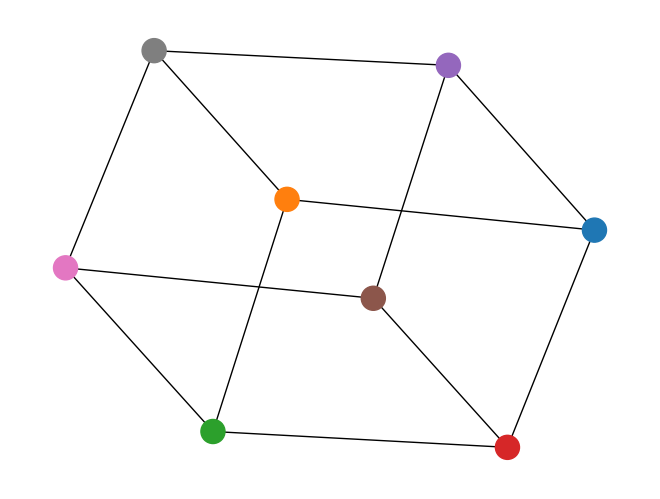

In [1]:
import networkx as nx
import matplotlib.colors as mcolors

colors = list(mcolors.TABLEAU_COLORS)
G = nx.cubical_graph()
node_colors = [colors[i] for i in G.nodes()]
nx.draw(G,node_color=node_colors)

Et pour attribuer une couleur (pour nous un numéro) à un sommet, on peut ajouter un attribut à un sommet.

Par exemple :

In [2]:
for n in G.nodes():
    G.nodes[n]['color'] = n

Et ensuite on peut aller chercher la couleur pour l'affichage.

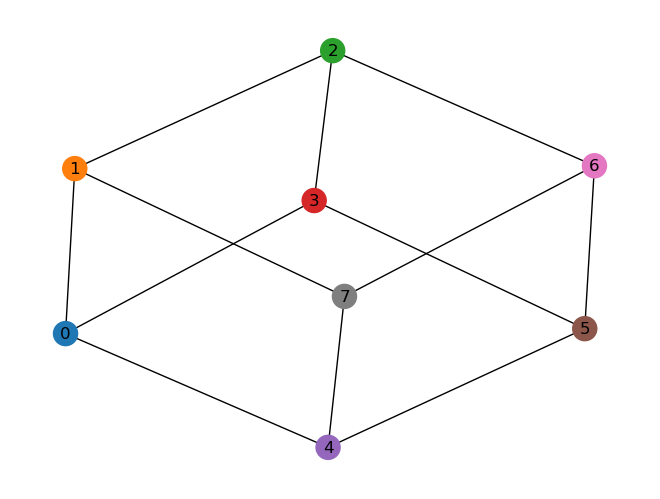

In [3]:
node_colors = [colors[G.nodes[i]['color']] for i in G.nodes()]
nx.draw(G,with_labels=True,node_color=node_colors)

On peut vérifier les couleurs.

In [4]:
for i in G.nodes():
    print(f"{i} : {G.nodes[i]['color']} {colors[i]}")

0 : 0 tab:blue
1 : 1 tab:orange
2 : 2 tab:green
3 : 3 tab:red
4 : 4 tab:purple
5 : 5 tab:brown
6 : 6 tab:pink
7 : 7 tab:gray


**Question 5.1** Implémentez l'algorithme `greedyColoring` et testez le nombre de couleurs nécessaires pour colorer le graphe ci-dessus. Atteint-on $\chi(G)$ pour ce graphe ?

In [56]:
def greedyColoring (G):
    """
    En sortie, les sommets de G ont un attribut 'color' (un entier), 
    tel que deux sommets voisins n'ont pas même valeur d'attribut.
    """
    for sommet in G.nodes():
        G.nodes[sommet]['color'] = None
        
    for sommet in G.nodes():
        G.nodes[sommet]['color']= sommet
        voisins = list(G.neighbors(sommet))
        print(voisins)
        color = 0
        for voisin in voisins:
            if (G.nodes[voisin]['color'] == color):
                color +=1
        G.nodes[sommet]['color'] = color

[1, 3, 4]
[0, 2, 7]
[1, 3, 6]
[0, 2, 5]
[0, 5, 7]
[3, 4, 6]
[2, 5, 7]
[1, 4, 6]


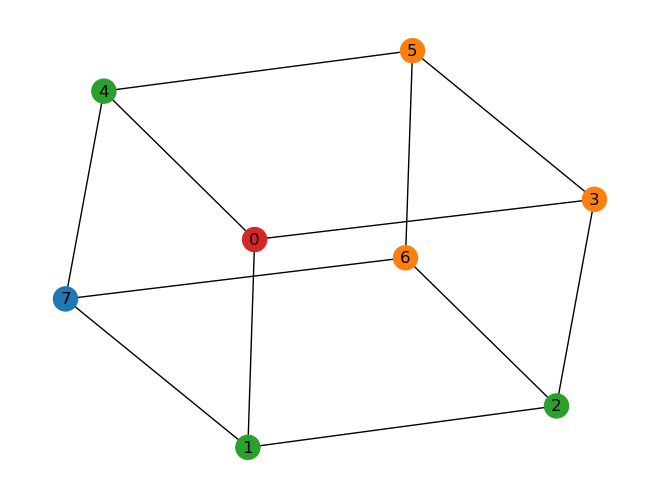

In [54]:
greedyColoring(G)
node_colors = [colors[G.nodes[i]['color']] for i in G.nodes()]
nx.draw(G,with_labels=True,node_color=node_colors)

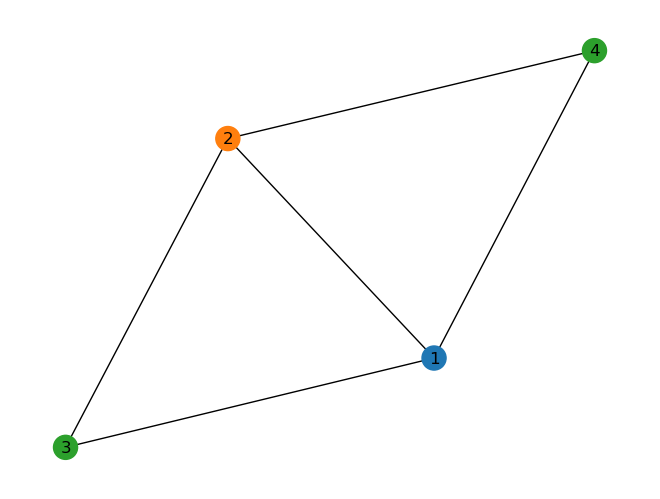

In [42]:
g = nx.Graph()
g.add_nodes_from([1, 2, 3, 4])
g.add_edges_from([(1,2), (1,3), (1,4), (2,3), (2,4)])
greedyColoring(g)
node_colors = [colors[g.nodes[i]['color']] for i in g.nodes()]
nx.draw(g,with_labels=True,node_color=node_colors)


Tester sur des graphes différents

**Question 5.2** Quelle est la complexité algorithmique de cet algorithme ?

In [ ]:
cet algorithme a une complexité en O()

On sent que, tout en restant sur cet algorithme glouton, l'ordre dans lequel on envisage les sommets peut influencer l'attribution des couleurs.

**Question 5.3** Trouvez un graphe 2-colorable, et 2 ordres dans lesquels envisager des sommets, dont l'un des ordres réalise une 2-coloration, et l'autre réalise une coloration avec plus de 2 couleurs lorsqu'on applique l'algorithme glouton naïf.

[2, 3, 4]
[1, 4]
[1]
[2, 1]


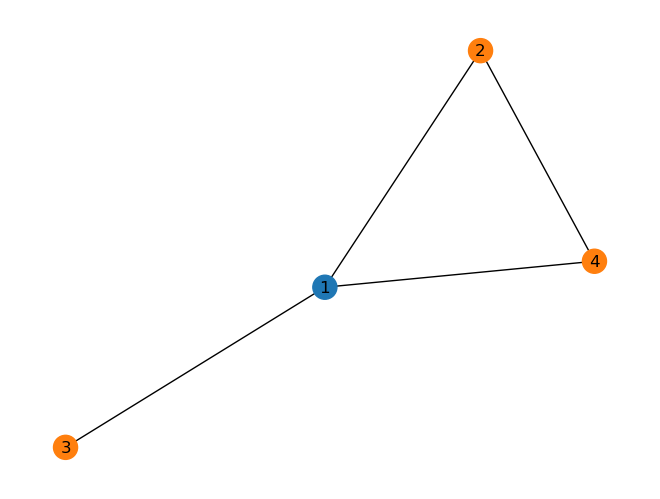

In [57]:
g = nx.Graph([(1,2), (1,3), (2,4), (4,1)])
greedyColoring(g)
node_colors = [colors[g.nodes[i]['color']] for i in g.nodes()]
nx.draw(g,with_labels=True,node_color=node_colors)

In [51]:
g = nx.Graph([(4,1), (1,2), (1,3), (2,4)])
greedyColoring(g)
node_colors = [colors[g.nodes[i]['color']] for i in g.nodes()]
nx.draw(g,with_labels=True,node_color=node_colors)

[1, 2]


TypeError: unhashable type: 'list'

## L'heuristique DSatur

On peut donc réfléchir à une stratégie "intelligente" d'exploration des sommets, avec laquelle on puisse aboutir à une coloration de graphe avec un nombre contenu de couleurs.

L'heursitique [DSatur](https://en.wikipedia.org/wiki/DSatur) a été proposée en 1979. Elle propose de calculer un degré de saturation à chacun des sommets, basé sur le nombre de couleurs déjà affectées à ses voisins. Plus le sommet est saturé, plus il est intéressant de l'envisager en premier pour lui affecter une couleur, vu que c'est ce sommet qui impose le plus de contraintes.

**Question 5.4** Mettez en oeuvre cette heuristique dans l'algorithme `greedyColoringDSatur` (notez bien que l'algorithme est très similaire à celui écrit précédemment, c'est juste dans la façon dont on sélectionne le prochain sommet à envisager qui change).

In [ ]:
def greedyColoringDSatur (G):
    """
    En sortie, les sommets de G ont un attribut 'color' (un entier), 
    tel que deux sommets voisins n'ont pas même valeur d'attribut.
    """
    pass

**Question 5.5** Comment se comporte cette heuristique sur le graphe donné en exemple plus haut ? Et sur celui trouvé à la question 5.3 ?

Tester sur d'autres graphes. Vérifier que l'heuristique fait bien son travail.

**Question 5.6** Quelle est la complexité algorithmique de cet algorithme dans le pire des cas ?

**Question 5.7** On peut lire dans la page Wikipedia *DSatur is known to be exact for bipartite graphs*. Expliquez pourquoi l'application de cette heuristique à un graphe biparti aboutit nécessairement à une coloration optimale.